# Data School Visualization Notebook

The purpose of this notebook is to illustrate different data visualization techniques using python

In [1]:
#Things to import
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#pip install folium
import folium
import folium.plugins as plugins

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Python Data Structures

There are a few ways python can store information. We are going to talk about 2 of them for data viz.

### Lists

- Lists are a built in python data structure. 
- They can store different values.
- Square Brackets [ ]

In [4]:
l1 = [1, 2, 3, 4]

In [12]:
l1

In [19]:
l2 = ['hi','I','me','your']

In [13]:
l2

In [8]:
l3 = ['hi',1,3]

In [14]:
l3

In [15]:
sorted(l2)

In [16]:
sorted(l3)

### Pandas Series and Dataframe

- A more efficient way to store information and perform calculations
- Uses numpy arrays (a 3rd form of data structure) under the hood
- A Series contains an index column and a values column
- A Dataframe is a collection of Series
- Can create from another python data structure OR read from file

In [25]:
#Use the lists from above
pd.DataFrame(l2, index=l1, columns=['word'])

In [102]:
#Create a dataframe from a csv file
df_water = pd.read_csv('viz_csvs/Water_Consumption_In_The_New_York_City.csv')

In [104]:
df_water

## Line/Scatter Plot

Give plt.plot x-values and y-values, example with lists

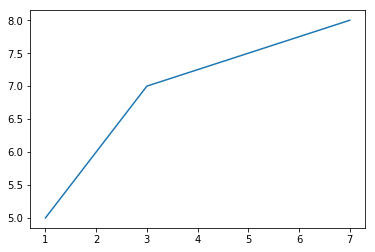

In [99]:
plt.plot([1,2,3,7],[5,6,7,8]);

Example using dataframes

In [3]:
df_water = pd.read_csv('viz_csvs/Water_Consumption_In_The_New_York_City.csv')

In [33]:
df_water.head()

In [34]:
df_water.info()

In [35]:
plt.plot(df_water['Year'],df_water['NYC Consumption(Million gallons per day)']);


In [36]:
plt.scatter(df_water['NYC Consumption(Million gallons per day)'],df_water['New York City Population']);
plt.title("Water Consumption in NYC");
plt.ylabel("Population");
plt.xlabel('Million gallons per day');

## Bar Chart

In [38]:
df_rest = pd.read_csv('viz_csvs/BK_Rest_Inspections.csv')

In [39]:
df_rest.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41401773,DUNKIN' DONUTS,BROOKLYN,721,FLATBUSH AVENUE,11226.0,7189406864,Donuts,08/19/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,11.0,A,08/19/2016,03/24/2019,Cycle Inspection / Initial Inspection
1,41474967,TAQUERIA LA PLACITA PUEBLA,BROOKLYN,830,BROADWAY,11206.0,7183021092,Mexican,09/12/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,09/12/2016,03/24/2019,Cycle Inspection / Initial Inspection
2,50039282,STERLING AFFAIR,BROOKLYN,250,JORALEMON ST,11201.0,7187807525,American,09/21/2018,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,5.0,A,09/21/2018,03/24/2019,Cycle Inspection / Initial Inspection
3,41162683,DUNKIN' DONUTS,BROOKLYN,1427,LINDEN BOULEVARD,11212.0,7183856338,Donuts,08/08/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,12.0,A,08/08/2017,03/24/2019,Cycle Inspection / Re-inspection
4,50068366,EL AMBIENTE,BROOKLYN,2896,FULTON ST,11207.0,3476272542,Spanish,06/26/2018,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,7.0,A,06/26/2018,03/24/2019,Cycle Inspection / Re-inspection


In [90]:
df_rest['CRITICAL FLAG'].value_counts()

Critical        24468
Not Critical    23231
Name: CRITICAL FLAG, dtype: int64

In [59]:
#Lists
plt.bar();


In [ ]:
#Series
plt.bar();

In [57]:
#Indices (To move bars to where you want them)


In [56]:
#xticks (To set custom labels)


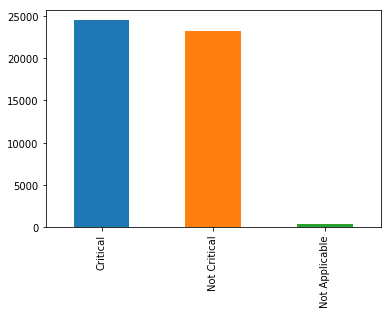

In [100]:
df_rest['CRITICAL FLAG'].value_counts().plot.bar();

## Histogram

In [62]:
df_parking = pd.read_csv('viz_csvs/DOF_Parking_Violation_Codes.csv')

In [63]:
df_parking.head()

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,30,NO STOP/STANDNG EXCEPT PAS P/U,515,515
1,60,ANGLE PARKING,65,45
2,13,NO STANDING-TAXI STAND,115,115
3,73,REG STICKER-MUTILATED/C'FEIT,65,65
4,38,FAIL TO DSPLY MUNI METER RECPT,65,35


In [81]:
df_parking['All Other Areas'].hist();

In [82]:
plt.hist(df_parking['All Other Areas']);

## Mapping

In [67]:
crashes_2019=pd.read_csv('viz_csvs/Vehicle_Collisions_2019.csv')

In [110]:
crashes_2019.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Zip Codes,Borough Boundaries,City Council Districts,Community Districts,Police Precincts
0,03/23/2019,4:19,MANHATTAN,10065.0,40.76297,-73.962160,"(40.76297, -73.96216)",NaN,NaN,301 EAST 63 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4102251,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,10090.0,4.0,1.0,23.0,11.0
1,03/23/2019,20:00,NaN,NaN,40.77958,-73.823320,"(40.77958, -73.82332)",22 AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4102000,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,14192.0,3.0,20.0,22.0,67.0
2,03/23/2019,6:15,MANHATTAN,10002.0,40.71997,-73.992905,"(40.71997, -73.992905)",DELANCEY STREET,CHRYSTIE STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4101841,Sedan,Pick-up Truck,NaN,NaN,NaN,11723.0,4.0,32.0,70.0,2.0
3,03/23/2019,20:30,NaN,NaN,40.69283,-73.854680,"(40.69283, -73.85468)",90 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passenger Distraction,Unspecified,NaN,NaN,NaN,4102370,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,24017.0,3.0,41.0,46.0,60.0
4,03/23/2019,17:59,MANHATTAN,10006.0,40.70983,-74.014680,"(40.70983, -74.01468)",WEST STREET,ALBANY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Unsafe Lane Changing,NaN,NaN,NaN,4102261,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,11727.0,4.0,32.0,56.0,1.0


In [106]:
#pip install folium
import folium

m = folium.Map(location=[40.738, -73.98],
                        zoom_start=12,
                        tiles="CartoDB dark_matter")

folium.Circle(
      location=[40.76297, -73.962160],
      radius=10,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)



m


In [97]:
m = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

for i in range(0,100):
    folium.Circle(
      location=[crashes_2019.iloc[i]['LATITUDE'], crashes_2019.iloc[i]['LONGITUDE']],
      #popup=data.iloc[i]['name'],
      radius=10,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

In [72]:
injured=crashes_2019[crashes_2019['NUMBER OF PERSONS INJURED']>0]

In [108]:
m = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

mat = injured[['LATITUDE', 'LONGITUDE']].as_matrix()

# plot heatmap
m.add_child(plugins.HeatMap(mat, radius=10))


## Exercises/Assignments

- Choose one or more of these to complete! Does not have to be in order

#### Easy

Make a line plot on New York City water consumption that is different from the one we made

Make a bar chart of the number of different resturaunt inspection types

Make a histogram of resturaunt scores (Lower scores are better than higher scores)

Make a map of the first 100 vehicle collisions using a different color and marker size

#### Medium

Make a bar chart of the top 10 restaraunt Cuisine Descriptions

Make a bar chart of the top 10 restaraunt Violation Descriptions

Make a map of 100 vehicle collisions using different colors for day and night

#### Hard

Make a map with 2 different markers, one for Contributing Factor Vehicle 1 Aggressive Driving/Road Rage and one for  Contributing Factor Vehicle 1 Glare

Make a stacked bar chart showing the critical/non critical flags for the top 3 resturaunt chains [example](https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html)

Create your own custom map or chart!

## Resources

[Link to Matplotlib Examples](https://matplotlib.org/gallery/index.html)